In [2]:
import re
import nltk
import pandas as pd
import numpy as np
import pickle

In [4]:
with open('transcript_text.pkl','rb') as pf:
    text = pickle.load(pf)

In [10]:
docs = [' '.join(i) for i in text]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=40000,
                             min_df=5, stop_words='english', use_idf=True)

In [24]:
%time text_tfidf = vectorizer.fit_transform(docs)

CPU times: user 2.38 s, sys: 4 ms, total: 2.39 s
Wall time: 2.39 s


In [25]:

print("  Actual number of tfidf features: %d" % text_tfidf.get_shape()[1])

  Actual number of tfidf features: 19894


In [26]:
from sklearn.decomposition import TruncatedSVD

In [32]:
svd = TruncatedSVD(200,n_iter=20)

In [33]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import Normalizer

lsa = make_pipeline(svd, Normalizer(copy=False))

In [34]:
%time text_lsa = lsa.fit_transform(text_tfidf)

CPU times: user 38.9 s, sys: 664 ms, total: 39.5 s
Wall time: 13.8 s


In [35]:
explained_variance = svd.explained_variance_ratio_.sum()
print("  Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

  Explained variance of the SVD step: 24%


In [36]:
from sklearn.cluster import KMeans

In [38]:
km = KMeans(n_clusters = 25, init='k-means++', max_iter=400, n_jobs=-1, verbose=1)

In [39]:
%time km.fit(text_lsa)

Initialization complete
Initialization complete
Initialization complete
start iteration
done sorting
start iteration
start iteration
end inner loop
done sorting
end inner loop
done sorting
end inner loop
Iteration 0, inertia 4371.81414716
Iteration 0, inertia 4604.24398925
start iteration
start iteration
Iteration 0, inertia 4357.70840943
Initialization complete
Initialization complete
start iteration
done sorting
done sorting
done sorting
Initialization complete
Initialization complete
end inner loop
Initialization complete
end inner loop
Iteration 1, inertia 4362.53000891
start iteration
done sorting
start iteration
end inner loop
start iteration
done sorting
Iteration 1, inertia 4236.95380493
start iteration
end inner loop
end inner loop
done sorting
done sorting
end inner loop
start iteration
done sorting
Iteration 1, inertia 4227.77137073
Iteration 2, inertia 4280.61340708
start iteration
end inner loop
done sorting
start iteration
end inner loop
Iteration 0, inertia 4366.99982194

start iteration
start iteration
end inner loop
Iteration 11, inertia 4106.83597124
start iteration
Iteration 14, inertia 4084.99798047
done sorting
done sorting
start iteration
done sorting
Iteration 14, inertia 4167.32025715
Iteration 12, inertia 4093.58235006
done sorting
start iteration
end inner loop
end inner loop
end inner loop
start iteration
end inner loop
done sorting
Iteration 11, inertia 4071.49501437
start iteration
Iteration 12, inertia 4093.7152849
Iteration 12, inertia 4103.69310975
done sorting
start iteration
done sorting
end inner loop
done sorting
Iteration 12, inertia 4086.99286487
start iteration
start iteration
done sorting
start iteration
Iteration 13, inertia 4081.75807318
start iteration
end inner loop
end inner loop
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 15, inertia 4084.55045464
done sorting
end inner loop
Iteration 13, inertia 4086.63724661
start iteration
done sorting
start iteration
Iteration 13, ine

Iteration 24, inertia 4154.18087389
Iteration 27, inertia 4083.30006981
Iteration 24, inertia 4069.63617873
done sorting
start iteration
start iteration
Iteration 27, inertia 4077.78190395
Iteration 26, inertia 4094.28857604
start iteration
done sorting
done sorting
done sorting
start iteration
end inner loop
end inner loop
start iteration
end inner loop
done sorting
end inner loop
done sorting
Iteration 24, inertia 4074.06208575
Iteration 26, inertia 4088.49582215
end inner loop
end inner loop
start iteration
Iteration 28, inertia 4083.26473748
done sorting
start iteration
Iteration 25, inertia 4069.12881516
Iteration 25, inertia 4154.12549469
end inner loop
start iteration
done sorting
Iteration 27, inertia 4094.28857604
start iteration
start iteration
Iteration 28, inertia 4077.75892647
end inner loop
done sorting
center shift 0.000000e+00 within tolerance 4.244318e-07
done sorting
done sorting
Iteration 27, inertia 4088.46618641
end inner loop
start iteration
start iteration
done s

start iteration
start iteration
done sorting
end inner loop
Iteration 50, inertia 4070.93352088
done sorting
start iteration
Iteration 15, inertia 4088.26367553
done sorting
end inner loop
start iteration
end inner loop
done sorting
Iteration 8, inertia 4095.58692749
Iteration 51, inertia 4070.92922763
end inner loop
start iteration
start iteration
done sorting
done sorting
Iteration 16, inertia 4086.63993863
end inner loop
end inner loop
start iteration
Iteration 52, inertia 4070.92456558
Iteration 9, inertia 4093.16763652
done sorting
start iteration
end inner loop
done sorting
end inner loop
start iteration
Iteration 17, inertia 4085.60719335
Iteration 53, inertia 4070.92456558
done sorting
center shift 0.000000e+00 within tolerance 4.244318e-07
start iteration
done sorting
end inner loop
end inner loop
Iteration 18, inertia 4084.82571804
start iteration
done sorting
end inner loop
Iteration 10, inertia 4090.43541329
Iteration 19, inertia 4084.29773396
start iteration
done sorting
e

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
    n_clusters=25, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [40]:
clusters = km.predict(text_lsa)

In [41]:
import seaborn as sns

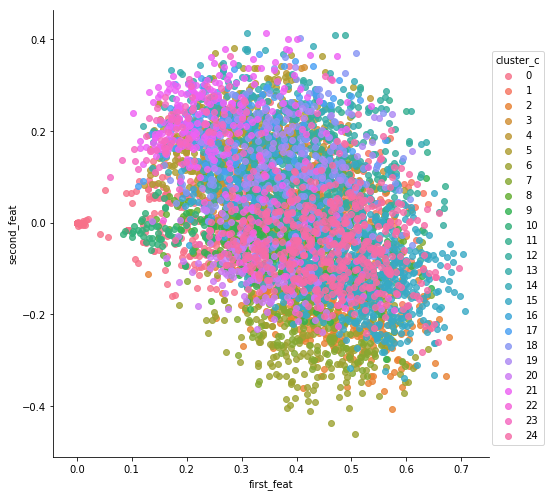

In [43]:
df = pd.DataFrame(text_lsa[:,0:2], columns = ['first_feat', 'second_feat'])
df['cluster_c'] = clusters

sns.lmplot(x = 'first_feat', y='second_feat', hue = 'cluster_c', data = df, fit_reg = False, size = 7)


In [45]:
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

In [46]:
terms = vectorizer.get_feature_names()

In [47]:
for i in range(25):
    print("Cluster %d:" % i, end='')
    print(" ")
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')  # print words in clusters
        print("")
    print(" ")
    print(" ")
print()

Cluster 0: 
 light
 science
 video
 images
 dance
 body
 image
 idea
 eyes
 moment
 book
 story
 create
 painting
 color
 love
 artists
 real
 film
 paper
 
 
Cluster 1: 
 money
 companies
 business
 dollars
 countries
 percent
 company
 economy
 market
 country
 economic
 billion
 social
 million
 growth
 government
 value
 global
 poverty
 income
 
 
Cluster 2: 
 story
 family
 children
 stories
 father
 mother
 child
 love
 home
 told
 went
 parents
 young
 came
 woman
 school
 country
 thought
 kids
 wanted
 
 
Cluster 3: 
 cancer
 patients
 disease
 health
 patient
 care
 medical
 drug
 surgery
 doctors
 medicine
 hospital
 drugs
 treatment
 doctor
 diseases
 data
 blood
 percent
 heart
 
 
Cluster 4: 
 food
 plants
 plant
 farmers
 trees
 species
 farm
 water
 soil
 grow
 seeds
 forest
 agriculture
 eating
 insects
 waste
 organic
 growing
 feed
 land
 
 
Cluster 5: 
 water
 ocean
 animals
 species
 fish
 planet
 surface
 animal
 marine
 land
 oceans
 whales
 birds
 coral
 place


In [56]:
cluster_counts = list(df['cluster_c'].value_counts())

In [64]:
FN0 = 'vocabulary-embedding'

with open('data/%s.data.pkl'%FN0, 'rb') as fp:
    X,Y = pickle.load(fp)
    
with open('data/%s.pkl'%FN0, 'rb') as fp:
    embedding, idx2word, word2idx, glove_idx2idx = pickle.load(fp)

In [68]:
titles = [' '.join([idx2word[k] for k in title]) for title in Y]

In [69]:
df['title'] = titles

In [75]:
for i in df[df['cluster_c'] == 17]['title']:
    print(i)

Citizen scientists searching for life beyond Earth Arfon Smith
Making sense of everything we know about space Renée Hlozek
The making of cosmic soup Renee Hlozek
Understanding asteroids Valerie Conn
Want interstellar travel Build interdisciplinary teams Mae Jemison
What a planet s fingerprint can tell us Lisa Kaltenegger
What does an alien look like Louisa Preston
A sci fi vision of love from a 318 year old hologram Monica Byrne
Adventures of an asteroid hunter Carrie Nugent
Allan Adams The discovery that could rewrite physics
Andrea Ghez The hunt for a supermassive black hole
Andrew Connolly What's the next window into our universe
Anil Ananthaswamy What it takes to do extreme astrophysics
Bill Stone The caves and the moon
Brian Cox What went wrong at the Large Hadron Collider
Carolyn Porco This is Saturn
Carter Emmart demos a 3D atlas of the universe
Charles Elachi The story of the Mars Rovers
Charles Fleischer insists All things are Moleeds
Computing a theory of everything Stephen W

In [93]:
cluster_centers = [list(i) for i in km.cluster_centers_]

In [108]:
df['cluster_center'] = df['cluster_c'].apply(lambda x: cluster_centers[x])

In [109]:
lengths = [len(x) for x in X]
df['talk_length'] = lengths

In [110]:
lsa_points = [list(i) for i in text_lsa]

In [111]:
df['lsa_point'] = lsa_points

In [112]:
space_topic = df[df.cluster_c == 17]
    

In [113]:
space_topic.to_pickle('space_df.pkl')